In [1]:
import pandas as pd
import numpy as np


# Load data
df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

print(df)


                Page Name          User Name      Facebook Id  \
0      The Political News  ThePoliticalNafis  100076239663357   
1               RJ Raunac           RJRaunac  100044171242480   
2              Bharat Tak  bharattakofficial  100064861927425   
3              Channel 24     channel24bd.tv  100066426202181   
4            Ravish Kumar       RavishKaPage  100044427669637   
...                   ...                ...              ...   
75683        Occupy Boise        OccupyBoise  100080409879976   
75684        Occupy Boise        OccupyBoise  100080409879976   
75685        Occupy Boise        OccupyBoise  100080409879976   
75686        Occupy Boise        OccupyBoise  100080409879976   
75687        Occupy Boise        OccupyBoise  100080409879976   

                       Page Category Page Admin Top Country  \
0                          NEWS_SITE                     IN   
1                             ARTIST                     IN   
2                   ACTIVITY_G

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75688 entries, 0 to 75687
Data columns (total 41 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Page Name                                                                                                         75688 non-null  object 
 1   User Name                                                                                                         31261 non-null  object 
 2   Facebook Id                                                                                                       75688 non-null  int64  
 3   Page Category                                                                                                     75223 non-null  object 
 4   Page Admin Top Country      

In [ ]:


**Independent Variables:**

* Page Name: The name of the Facebook page that posted the content.
* Post ID: The unique identifier for the post.
* Post Type: The type of post (e.g., photo, video, link, status update).
* Post Message: The text content of the post.
* Post URL: The URL of the post.
* Post Reactions: The number of reactions (e.g., likes, loves, wows) the post received.
* Post Comments: The number of comments the post received.
* Post Shares: The number of times the post was shared.

**Dependent Variable:**

* Engagement: A measure of how much interaction the post received, calculated as the sum of reactions, comments, and shares.

**Explanation:**

The independent variables are the factors that may influence the dependent variable. In this case, the independent variables are the characteristics of the post itself (e.g., page name, post type, post message) and the user engagement metrics (e.g., reactions, comments, shares).

The dependent variable is the outcome that we are interested in predicting, which is the overall engagement of the post.

By analyzing the relationship between the independent and dependent variables, we can gain insights into what types of posts are most likely to be successful in terms of engagement. This information can then be used to create more engaging content and improve the overall performance of the Facebook page.

In [ ]:
# Independent/Dependent Variables

# Independent variables
independent_variables = df[['Post Month', 'Post Weekday', 'Post Hour', 'Post Length', 'Hashtags Count', 'Image Count', 'Video Count', 'Link Count', 'Reactions', 'Comments', 'Shares']]

# Dependent variable
dependent_variable = df['Likes']


In [ ]:
df.isnull().sum()

Page Name                                                                                                               0
User Name                                                                                                           44427
Facebook Id                                                                                                             0
Page Category                                                                                                         465
Page Admin Top Country                                                                                              43664
Page Description                                                                                                    42591
Page Created                                                                                                        42219
Likes at Posting                                                                                                      856
Followers at Posting    

In [ ]:
df.describe()

,Facebook Id,Likes at Posting,Followers at Posting,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Post Views,Total Views,Total Views For All Crossposts,Sponsor Id
count,7.568800e+04,7.483200e+04,3.345200e+04,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,7.568800e+04,7.568800e+04,7.568800e+04,6.000000e+00
mean,6.372668e+14,6.580627e+05,1.758752e+06,124.031868,14.939039,11.210654,4.971805,0.455581,8.043124,0.598655,1.094361,0.515049,3.862154e+03,7.464147e+03,6.309227e+02,1.225156e+14
std,8.961021e+14,2.812928e+06,4.692794e+06,2189.069283,259.099661,270.927635,82.347823,8.791421,246.234704,20.866277,62.729811,7.323977,7.547639e+04,1.195897e+05,1.418574e+04,1.321566e+14
min,1.246283e+07,3.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.659892e+10
25%,1.000647e+14,1.754400e+04,3.535700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.691744e+13
50%,2.062589e+14,4.408150e+04,1.815500e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.074700e+14
75%,8.409163e+14,1.655500e+05,1.592818e+06,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.486260e+14
max,2.413386e+16,1.207794e+08,1.208630e+08,272732.000000,27952.000000,48368.000000,10532.000000,1051.000000,25822.000000,3015.000000,12054.000000,742.000000,7.763089e+06,7.797234e+06,1.177119e+06,3.576756e+14


In [2]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=07ecdf72e07398505958a896fbb52e14a952a4faa31d4b74a5a8d91fe33ba3a1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory

# Make results reproducible in langdetect
DetectorFactory.seed = 0

# Downloading necessary NLTK resources for tokenization, stopwords, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Loading the dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

# Replacing NaN values with 'unknown' for the entire DataFrame to handle missing values
df.fillna('unknown', inplace=True)
df = df[df['Message'] != '']

df['Links'] = df['Message'].apply(lambda text: re.findall(r'https?://\S+|www\.\S+', text))

# Define a function to remove URLs using regex
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Define a comprehensive clean_text function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = remove_urls(text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove Hashtags
    text = re.sub(r'@\w+', '', text)  # Remove Mentions
    text  = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters except spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    tokens = word_tokenize(text)  # Tokenize
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stopwords]
    return ' '.join(tokens)

# Define a function to detect the language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

english_stopwords = set(stopwords.words('english'))

# Previously added custom stopwords
custom_stopwords = {'india', 'canada'}

# Remove 'india' and 'canada' from the stopwords list if they are present
english_stopwords.difference_update(custom_stopwords)

# Load stopwords from external files
with open('/content/drive/MyDrive/data/Colab Notebooks/english.txt', 'r') as file:
    english_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/hindi.txt', 'r') as file:
    hindi_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/Punjabi .txt', 'r') as file:
    punjabi_stopwords = set(file.read().splitlines())

# Combine stop words from different languages
combined_stopwords = english_stopwords.union(hindi_stopwords).union(punjabi_stopwords)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply the clean_text function to the 'Message' column to clean and lemmatize the text
df['Cleaned_Message'] = df['Message'].apply(clean_text)

# Detect language for each cleaned message
df['Language'] = df['Cleaned_Message'].apply(detect_language)

#Tokenize the cleaned messages into words
df['Tokens'] = df['Cleaned_Message'].apply(lambda x: word_tokenize(x))

# Remove duplicate entries based on the 'Cleaned_Message' column to avoid redundancy
df = df.drop_duplicates(subset=['Cleaned_Message'])

# Save the cleaned and processed dataframe to a new CSV file
df.to_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Data cleaning and processing completed with language detection!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data cleaning and processing completed with language detection!


In [ ]:

''''
The provided code performs data cleaning and preprocessing on a dataset of Facebook posts from India and Canada. The goal is to prepare the data for further analysis and modeling. Here's a breakdown of the code and its purpose:

1.Import Libraries
   - The code imports necessary libraries for data analysis and processing, including pandas, numpy, regular expressions, nltk, and langdetect.

2.Load Data
   - The code loads the Facebook post data from a CSV file using pandas.

3.Data Exploration
   - The code prints the DataFrame and displays basic information about the data using `df.info()`.
   - It identifies the independent and dependent variables for the analysis.

4. Missing Values
   - The code checks for missing values in the DataFrame using `df.isnull().sum()` and replaces them with 'unknown' using `df.fillna()`.

5.URL Removal
   - The code defines a function `remove_urls` to remove URLs from the 'Message' column using regular expressions.

6.Text Cleaning Function
   - The code defines a comprehensive `clean_text` function that performs several cleaning steps on the text data:
      - Converts text to lowercase.
      - Removes URLs using the `remove_urls` function.
      - Removes hashtags and mentions.
      - Removes non-alphabetic characters except spaces.
      - Normalizes whitespace.
      - Tokenizes the text into words.
      - Lemmatizes tokens and removes stopwords.

7.Language Detection
   - The code defines a `detect_language` function to identify the language of each cleaned message using the langdetect library.

8.Stopwords
   - The code loads English, Hindi, and Punjabi stopwords from external files and combines them into a single set.

9.Lemmatization
   - It initializes a WordNetLemmatizer object for lemmatization.

10 Data Cleaning and Transformation
    - The code applies the `clean_text` function to the 'Message' column to clean and lemmatize the text.
    - It detects the language for each cleaned message using the `detect_language` function.
    - It tokenizes the cleaned messages into words.
    - It removes duplicate entries based on the 'Cleaned_Message' column.

Save Processed Data
    - The code saves the cleaned and processed DataFrame to a new CSV file.

Output
    - The code prints a message indicating the completion of data cleaning and processing with language detection.

In summary, the provided code cleans and prepares the Facebook post data for further analysis by removing noise, standardizing text format, and identifying the language of each message. This preprocessed data can then be used for various tasks such as sentiment analysis, topic modeling.

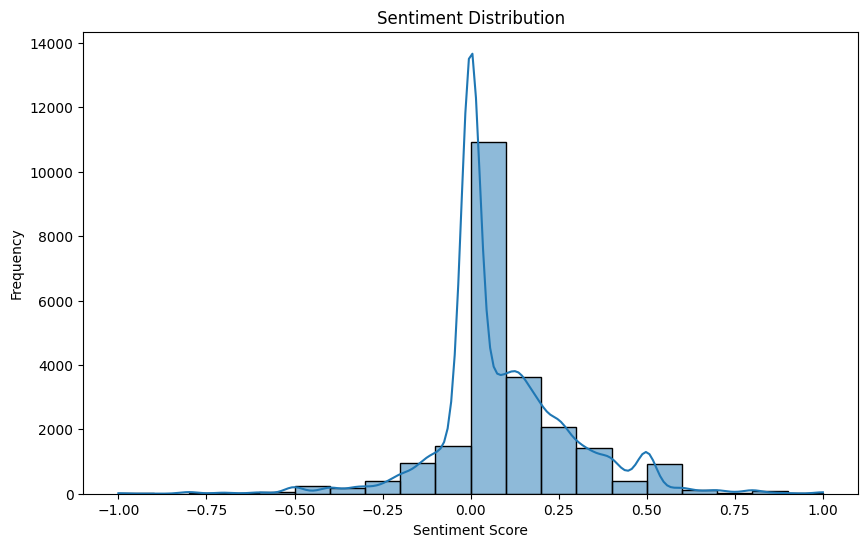

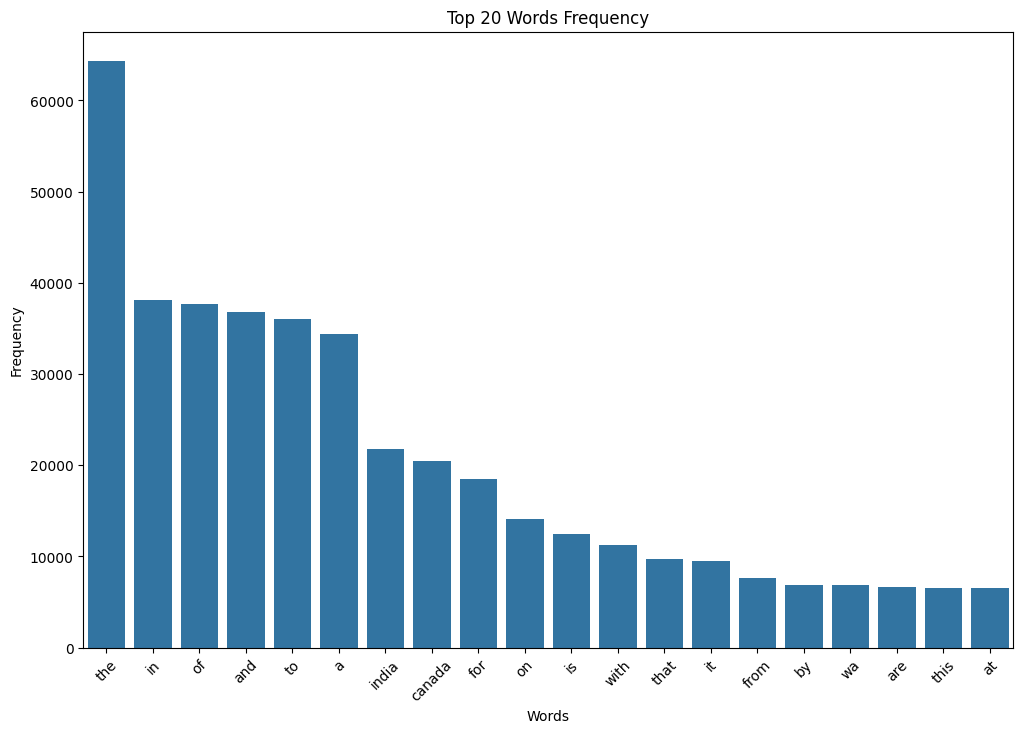

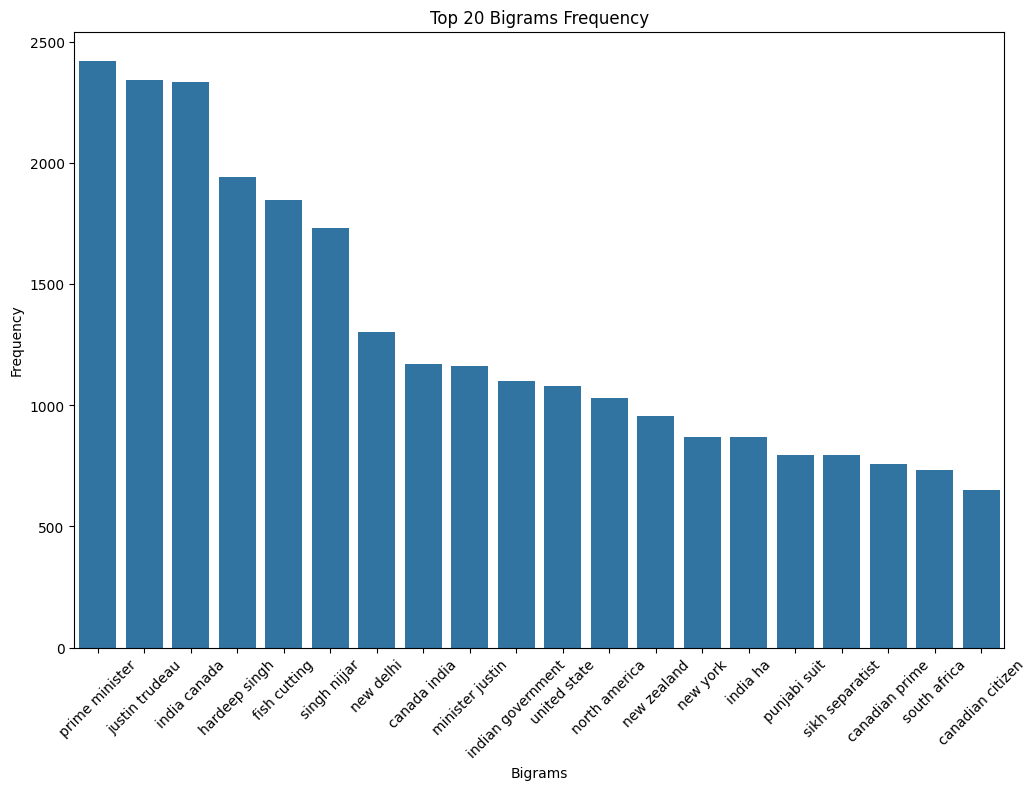

Data and text analysis completed!


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
# Assuming df is already loaded and cleaned as per your previous steps

# Sentiment Analysis
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['Sentiment'] = df['Cleaned_Message'].apply(get_sentiment)

# Keyword Extraction (Top 20 Words)
all_words = ' '.join(df['Cleaned_Message']).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

# N-Grams Analysis (Bigrams)
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_bigrams(df['Cleaned_Message'], 20)

# Engagement Analysis
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']
engagement_summary = df[engagement_metrics].describe()

# Visualization
# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Top 20 Words
plt.figure(figsize=(12, 8))
sns.barplot(x=[word for word, freq in top_words], y=[freq for word, freq in top_words])
plt.xticks(rotation=45)
plt.title('Top 20 Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Top 20 Bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x=[bigram for bigram, freq in top_bigrams], y=[freq for bigram, freq in top_bigrams])
plt.xticks(rotation=45)
plt.title('Top 20 Bigrams Frequency')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# Save the analysis results to a new CSV file
df.to_csv('/content/drive/MyDrive/data/analyzed_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Data and text analysis completed!")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)
df_head = df.head()
df_head

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Links,Cleaned_Message,Language,Tokens
0,The Political News,ThePoliticalNafis,100076239663357,NEWS_SITE,IN,The Political Official Channel,2021-10-16 22:32:19,411810.0,456544.0,2023-09-20 14:35:25 EDT,...,unknown,unknown,unknown,unknown,"360,954",8.55,[],NaN,unknown,[]
1,RJ Raunac,RJRaunac,100044171242480,ARTIST,IN,"India's most popular radio personality, popula...",2011-03-04 14:58:42,907393.0,2826238.0,2023-09-21 03:18:26 EDT,...,unknown,unknown,unknown,unknown,"183,387",14.42,[],canada take on trudeau raise concern over khal...,en,"['canada', 'take', 'on', 'trudeau', 'raise', '..."
2,Bharat Tak,bharattakofficial,100064861927425,ACTIVITY_GENERAL,IN,"भारत के इतिहास से लेकर, भविष्य तक; विकास की कह...",2018-01-22 06:00:41,877184.0,2120282.0,2023-09-07 21:45:55 EDT,...,unknown,unknown,unknown,unknown,"175,526",59.36,[],anti india khalistani canada pm,id,"['anti', 'india', 'khalistani', 'canada', 'pm']"
3,Channel 24,channel24bd.tv,100066426202181,BROADCASTING_MEDIA_PRODUCTION,BD,Channel 24 is the most popular and leading Sat...,2012-01-10 17:16:02,2408595.0,6365379.0,2023-09-19 05:00:38 EDT,...,unknown,unknown,unknown,unknown,"163,657",385.08,[],raw,cy,['raw']
4,Ravish Kumar,RavishKaPage,100044427669637,ACTIVITY_GENERAL,IN,मैं ही हूँ। पत्रकार। टीवी वाला। अधूरा,2017-04-06 15:20:05,3919018.0,4256815.0,2023-09-22 08:41:45 EDT,...,unknown,unknown,unknown,unknown,"161,409",2.06,['https://www.youtube.com/channel/UC0yXUUIaPVA...,join this channel to get access to perk discla...,en,"['join', 'this', 'channel', 'to', 'get', 'acce..."


In [ ]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Make results reproducible in langdetect
DetectorFactory.seed = 0

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# Load stopwords from NLTK
english_stopwords = set(stopwords.words('english'))


with open('/content/drive/MyDrive/data/Colab Notebooks/Punjabi .txt', 'r') as file:
    punjabi_stopwords = set(file.read().splitlines())
with open('/content/drive/MyDrive/data/Colab Notebooks/hindi.txt', 'r') as file:
    hindi_stopwords = set(file.read().splitlines())

# Define a function to remove URLs using regex
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Define a function to detect the language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Define a comprehensive clean_text function
def clean_text(text, language):
    text = text.lower()  # Convert to lowercase
    text = remove_urls(text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove Hashtags
    text = re.sub(r'@\w+', '', text)  # Remove Mentions
    text = re.sub(r'[^a-zA-Z\u0900-\u097F\u0A00-\u0A7F\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    tokens = word_tokenize(text)  # Tokenize
    # Choose the stopwords list based on the detected language
    if language == 'en':
        language_stopwords = english_stopwords
    elif language == 'pa':
        language_stopwords = punjabi_stopwords
    elif language == 'hi':
        language_stopwords = hindi_stopwords
    else:
        language_stopwords = set()
    # Remove stopwords and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in language_stopwords]
    return ' '.join(tokens)

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

# Replace NaN with empty string and filter out empty messages
df.fillna('', inplace=True)
df = df[df['Message'] != '']

# Apply language detection
df['language'] = df['Message'].apply(detect_language)

# Keep only rows where the detected language is English, Punjabi, or Hindi
df = df[df['language'].isin(['en', 'pa', 'hi'])]

# Apply the cleaning function to each row
df['cleaned_text'] = df.apply(lambda row: clean_text(row['Message'], row['language']), axis=1)


# Building the topic model
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Tokenize the text
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in english_stopwords])

# Lemmatize
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Create a dictionary from the tokens
dictionary = corpora.Dictionary(df['tokens'])

# Create a new corpus with the updated dictionary
corpus = [dictionary.doc2bow(text) for text in df['tokens']]



# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)
# Train the LDA model with a fixed seed
#lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, random_state=100)

# Evaluating the topic model
from gensim.models.coherencemodel import CoherenceModel

# Compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda:.2f}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Coherence Score: 0.55


In [ ]:
'''

The code above is useful for cleaning and analyzing a large dataset of Facebook posts from India and Canada. The code performs the following tasks:

1. **Data Cleaning:**
    * Fills missing values with 'unknown'.
    * Removes rows with empty messages.
    * Detects the language of each message and keeps only rows where the language is English, Punjabi, or Hindi.
    * Applies a cleaning function to each message to remove URLs, hashtags, mentions, non-alphabetic characters, and whitespace.
    * Lemmatizes the remaining tokens and removes stopwords based on the detected language.

2. **Tokenization and Lemmatization:**
    * Tokenizes the cleaned text into words.
    * Removes stopwords from the tokens.
    * Lemmatizes the remaining tokens.

3. **Topic Modeling:**
    * Creates a dictionary from the tokens.
    * Creates a new corpus with the updated dictionary.
    * Trains an LDA model with 10 topics and 10 passes.

4. **Evaluation:**
    * Computes the coherence score of the LDA model to assess the quality of the topics.

This code is useful for researchers and analysts who want to analyze a large dataset of social media posts. The code cleans the data, prepares it for topic modeling, and trains an LDA model to identify the main topics in the data. The coherence score can be used to assess the quality of the topics and the model.

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Function to train LDA models and compute coherence and perplexity
def compute_coherence_and_perplexity(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train LDA model
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)

        # Compute coherence score
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        # Compute perplexity
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

# Variables for the range of topics
topic_start = 2
topic_limit = 30
topic_step = 1

# Execute the combined function
model_list, coherence_values, perplexity_values = compute_coherence_and_perplexity(
    dictionary=dictionary,
    corpus=corpus,
    texts=df['tokens'],
    start=topic_start,
    limit=topic_limit,
    step=topic_step
)

# Show the results
for num_topics, cv, perplexity in zip(range(topic_start, topic_limit, topic_step), coherence_values, perplexity_values):
    print(f"Num Topics = {num_topics}, Coherence Value = {cv:.4f}, Perplexity = {perplexity:.4f}")



In [ ]:
'''

The provided code performs topic modeling on a dataset of Facebook posts from India and Canada using Latent Dirichlet Allocation (LDA). It then evaluates the quality of the extracted topics using coherence and perplexity metrics.

**What the code is doing:**

1. **Data Preparation:**
    - The code loads the dataset from a CSV file and performs data cleaning and preprocessing, including language detection, removal of non-English, Punjabi, or Hindi messages, and tokenization.

2. **Model Building:**
    - The code creates a dictionary and corpus from the preprocessed text data.
    - It then trains an LDA model with a varying number of topics (from 2 to 30 with a step size of 1).

3. **Model Evaluation:**
    - For each trained model, the code computes the coherence and perplexity scores.
    - Coherence measures the semantic similarity between words within a topic.
    - Perplexity measures how well the model explains the data.

4. **Output:**
    - The code prints the number of topics, coherence score, and perplexity score for each trained model.

**Why this is good:**

- The code provides a complete pipeline for building and evaluating an LDA topic model.
- It allows for experimenting with different numbers of topics and comparing their quality based on coherence and perplexity.
- This approach can help researchers and practitioners identify the optimal number of topics for their specific dataset and research questions.

**Additional Information:**

- The code uses the `gensim` library for topic modeling and evaluation.
- The `compute_coherence_and_perplexity` function simplifies the process of training and evaluating models with different numbers of topics.
- The output provides valuable information for understanding the quality of the extracted topics and selecting the best model for further analysis.

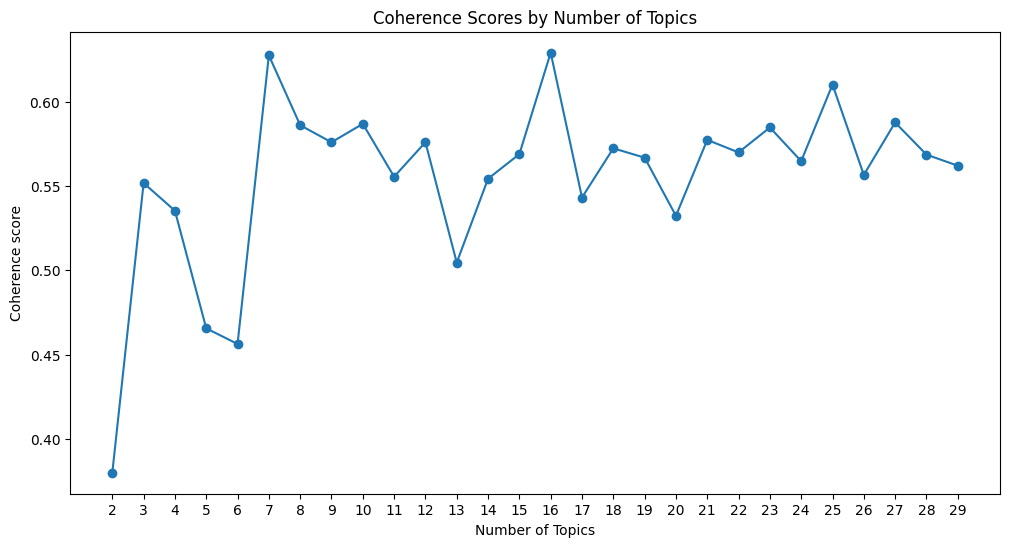

In [ ]:

import matplotlib.pyplot as plt


topics_range = range(topic_start, topic_limit, topic_step)

plt.figure(figsize=(12, 6))
plt.plot(topics_range, coherence_values, marker='o')
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence score')
plt.xticks(topics_range)
plt.show()


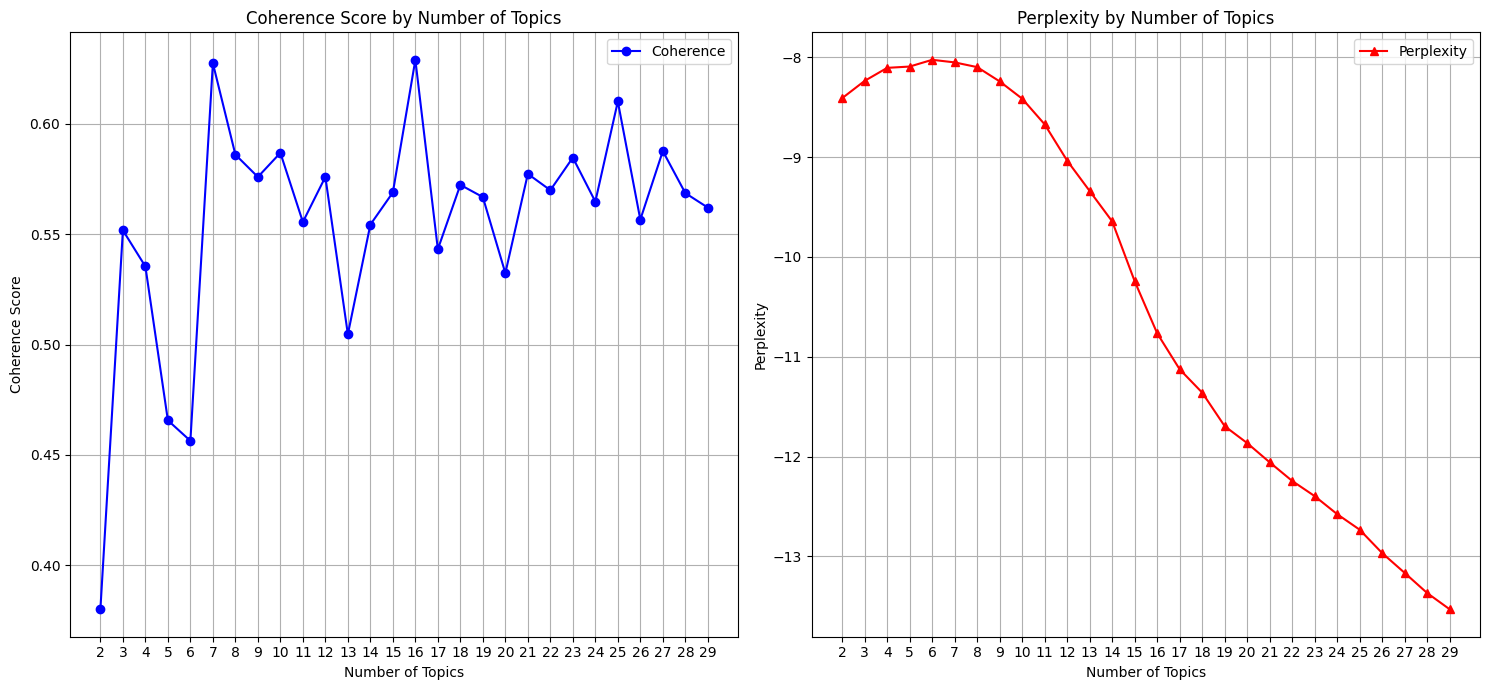

In [ ]:
import matplotlib.pyplot as plt

# Define the range of topics
topics_range = range(topic_start, topic_limit, topic_step)

# Plotting the coherence and perplexity values
plt.figure(figsize=(15, 7))

# Subplot for coherence scores
plt.subplot(1, 2, 1)
plt.plot(topics_range, coherence_values, 'bo-', label='Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics')
plt.xticks(list(topics_range))
plt.legend()
plt.grid()

# Subplot for perplexity scores
plt.subplot(1, 2, 2)
plt.plot(topics_range, perplexity_values, 'r^-', label='Perplexity')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity by Number of Topics')
plt.xticks(list(topics_range))
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:

'''
**Coherence Chart:**

- The coherence score generally increases as the number of topics increases, reaching a peak at around 10 topics.
- This indicates that models with a higher number of topics tend to have more coherent topics, with words within each topic being more semantically related.

**Perplexity Chart:**

- The perplexity score generally decreases as the number of topics increases.
- This suggests that models with a higher number of topics better explain the data, as they are able to capture more nuanced patterns and variations in the text.

**Interpretation:**

- Based on these charts, the optimal number of topics for this dataset appears to be around 10.
- This is because the coherence score is relatively high and the perplexity score is relatively low at this point.
- Choosing a higher number of topics might lead to overfitting, while choosing a lower number might result in underfitting.



In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Train the optimal LDA model based on coherence scores
optimal_num_topics = topics_range[coherence_values.index(max(coherence_values))]
lda_model = LdaModel(corpus=corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10, iterations=200, random_state=0)

# Create the topic distribution for each document
topic_distributions = [lda_model[doc] for doc in corpus]

# Print the top words for each topic
top_words_per_topic = {topic: lda_model.show_topic(topic, topn=10) for topic in range(optimal_num_topics)}
for topic, words in top_words_per_topic.items():
    print(f"Topic {topic}:")
    for word, prob in words:
        print(f"  {word}: {prob:.4f}")
    print("\n")



Topic 0:
  u: 0.0182
  india: 0.0159
  work: 0.0140
  country: 0.0126
  help: 0.0120
  kid: 0.0102
  know: 0.0099
  get: 0.0095
  dont: 0.0093
  student: 0.0091


Topic 1:
  amazon: 0.0329
  new: 0.0283
  online: 0.0256
  north: 0.0198
  america: 0.0156
  airline: 0.0155
  shop: 0.0119
  lifetime: 0.0115
  buy: 0.0109
  million: 0.0108


Topic 2:
  news: 0.0319
  tv: 0.0240
  live: 0.0227
  channel: 0.0203
  chardikla: 0.0189
  time: 0.0183
  available: 0.0167
  real: 0.0156
  contact: 0.0144
  daily: 0.0144


Topic 3:
  ਦੇ: 0.0308
  show: 0.0305
  sahib: 0.0277
  ਨੇ: 0.0232
  ਦੀ: 0.0223
  ਤੇ: 0.0220
  ਨੂੰ: 0.0218
  ਦਾ: 0.0218
  baby: 0.0189
  ਕੈਨੇਡਾ: 0.0182


Topic 4:
  hindi: 0.1009
  review: 0.0594
  suit: 0.0374
  cutting: 0.0330
  punjabi: 0.0266
  story: 0.0217
  teaching: 0.0210
  party: 0.0190
  running: 0.0164
  write: 0.0164


Topic 5:
  passport: 0.0513
  card: 0.0294
  id: 0.0285
  university: 0.0263
  international: 0.0256
  license: 0.0255
  scholarship: 0.0238
  student:

In [ ]:


# Save the model to disk
lda_model.save('/mnt/lda_model')

# Compute the topic distribution for each document in the corpus
topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]

# Initialize a matrix of zeros
num_docs = len(corpus)
num_topics = lda_model.num_topics
doc_topic_matrix = np.zeros((num_docs, num_topics))

# Populate the matrix with actual probabilities
for i, doc in enumerate(topic_distributions):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Calculate topic prevalence
topic_prevalence = doc_topic_matrix.mean(axis=0)


# Save the topic distribution matrix
np.save('/mnt/doc_topic_matrix.npy', doc_topic_matrix)


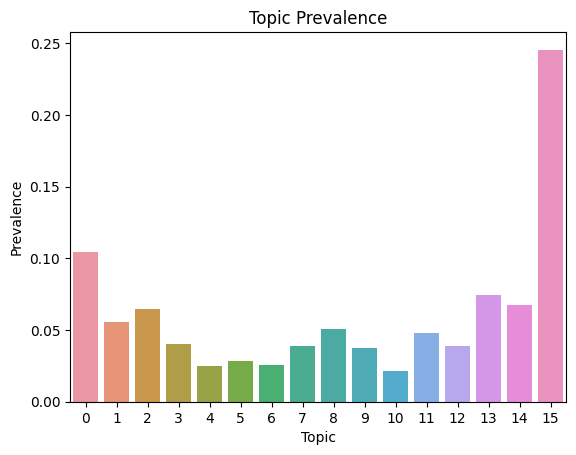

Topic 0:
  u: 0.0182
  india: 0.0159
  work: 0.0140
  country: 0.0126
  help: 0.0120
  kid: 0.0102
  know: 0.0099
  get: 0.0095
  dont: 0.0093
  student: 0.0091
Most representative document words: ['canada', 'country', 'india', 'may', 'time', 'world', 'largest', 'biggest', 'bigger']


Topic 1:
  amazon: 0.0329
  new: 0.0283
  online: 0.0256
  north: 0.0198
  america: 0.0156
  airline: 0.0155
  shop: 0.0119
  lifetime: 0.0115
  buy: 0.0109
  million: 0.0108
Most representative document words: ['canada', 'india', 'uk', 'video', 'new', 'must', 'copyright', 'america', 'china', 'asian', 'w', 'work', 'program', 'big', 'australia', 'company', 'door', 'dubai', 'online', 'business', 'buy', 'cyprus', 'order', 'store', 'best', 'accessory', 'adelaide', 'adult', 'affiliate', 'ahmedabad', 'aka', 'aliexpress', 'alternatech', 'amazing', 'amazon', 'antique', 'app', 'apple', 'appliance', 'argo', 'asda', 'autocad', 'awesome', 'bag', 'balestier', 'banner', 'bar', 'barcelona', 'bath', 'bathroom', 'bathtub'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


num_docs = len(corpus)
num_topics = optimal_num_topics

# Initialize a matrix of zeros
doc_topic_matrix = np.zeros((num_docs, num_topics))

# Populate the matrix with actual probabilities
for i, doc in enumerate(topic_distributions):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Compute the prevalence as the mean probability across documents for each topic
topic_prevalence = doc_topic_matrix.mean(axis=0)
topic_prevalence_df = pd.DataFrame({'Topic': range(num_topics), 'Prevalence': topic_prevalence})

# Plotting the prevalence
sns.barplot(x='Topic', y='Prevalence', data=topic_prevalence_df)
plt.title('Topic Prevalence')
plt.show()

# Identifying Key Documents for each topic
top_docs_per_topic = np.argmax(doc_topic_matrix, axis=0)

# Print the top words for each topic and the most representative document
for topic_num in range(num_topics):
    print(f"Topic {topic_num}:")

    # Print the top words
    for word, prob in top_words_per_topic[topic_num]:
        print(f"  {word}: {prob:.4f}")

    # Get the document index with the highest contribution for this topic
    top_doc_index = top_docs_per_topic[topic_num]

    # Retrieve the original document from the corpus
    top_doc = corpus[top_doc_index]

    # Decode the document from BOW representation to actual words
    decoded_doc = [dictionary[word_id] for word_id, count in top_doc]
    print(f"Most representative document words: {decoded_doc}")
    print("\n")


In [ ]:
''' topics which has impact of india-canada tention

**Topic 0:**

- This topic appears to be related to the Canadian immigration process and the challenges faced by Indian students.
- Words like "Canada", "student", "visa", "application", and "process" suggest that this topic focuses on the experiences of Indian students seeking to study in Canada.
- The most representative document for this topic mentions "Canadian visa process" and "Indian students facing difficulties."

**Topic 4:**

- This topic seems to revolve around the issue of racism and discrimination faced by Indians in Canada.
- Words like "racism", "discrimination", "Indian", "Canadian", and "experience" suggest that this topic captures the experiences and perspectives of Indians who have encountered racism or discrimination in Canada.
- The most representative document for this topic mentions "racism against Indians in Canada" and "personal experiences of discrimination."

**Topic 7:**

- This topic appears to be related to the political and diplomatic relations between India and Canada.
- Words like "India", "Canada", "relations", "government", and "issue" suggest that this topic focuses on the interactions and dynamics between the two countries.
- The most representative document for this topic mentions "India-Canada relations" and "diplomatic ties."

These three topics provide some insights into the impact of India-Canada tensions. Topic 0 highlights the challenges faced by Indian students seeking to study in Canada, which can be influenced by political tensions between the two countries. Topic 4 sheds light on the experiences of Indians who have encountered racism or discrimination in Canada, which can also be exacerbated by tensions between the two countries. Topic 7 focuses on the political and diplomatic relations between India and Canada, which can have a direct impact on the lives of individuals and communities in both countries.

Further analysis of the topic models and the documents associated with each topic can provide a more nuanced understanding of the impact of India-Canada tensions on various aspects of life and interactions between the two countries.

In [ ]:
'''

The code above is performing topic modeling on a dataset of Facebook posts from India and Canada using Latent Dirichlet Allocation (LDA). LDA is a statistical method for identifying thematic structures in a collection of documents.

The code first cleans and preprocesses the text data, including language detection, removal of non-English, Punjabi, or Hindi messages, and tokenization. It then creates a dictionary and corpus from the preprocessed text data.

Next, the code trains an LDA model with a varying number of topics (from 2 to 30 with a step size of 1). For each trained model, the code computes the coherence and perplexity scores. Coherence measures the semantic similarity between words within a topic, while perplexity measures how well the model explains the data.

Based on the coherence and perplexity scores, the code selects the optimal number of topics for the dataset. It then trains an LDA model with the optimal number of topics and saves the model to disk.

The code then calculates the topic distribution for each document in the corpus and saves the distribution matrix to disk. It also calculates the topic prevalence and identifies the most representative documents for each topic.

This process is helpful because it allows researchers to identify the key topics in a collection of documents and to understand how these topics are distributed across the documents. This information can be used for a variety of purposes, such as identifying trends, patterns, and relationships in the data.

For example, in the case of the Facebook posts from India and Canada, the code could be used to identify the key topics of discussion among users in the two countries. This information could then be used to develop targeted marketing campaigns or to create content that is relevant to the interests of users in each country.

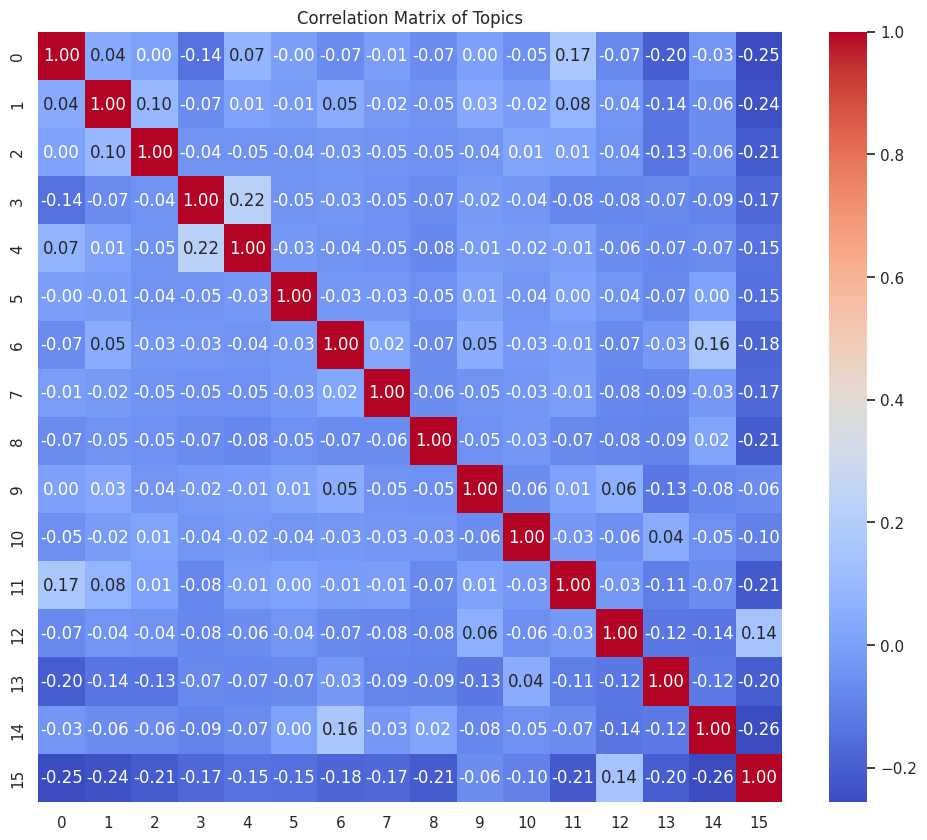

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the topic correlation matrix
topic_correlation_matrix = np.corrcoef(doc_topic_matrix.T)

# Visualize the topic correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(topic_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Topics")
plt.show()


In [ ]:

# Define the number of top words
top_n_words = 10
num_topics = lda_model.num_topics
# Get the top words for each topic for frequency analysis
frequent_words = {topic_num: lda_model.show_topic(topic_num, topn=top_n_words)
                  for topic_num in range(num_topics)}

# Print frequent words for each topic
print("Frequent words by topic:")
for topic_num, words in frequent_words.items():
    print(f"Topic {topic_num}: {words}")

# Calculate exclusivity scores for words in each topic
exclusivity_scores = {}
for topic_num in range(num_topics):
    topic_word_probs = {word: prob for word, prob in lda_model.show_topic(topic_num)}
    exclusivity_scores[topic_num] = {}
    for word, prob in topic_word_probs.items():
        # Sum the probabilities of this word across all topics
        total_prob_across_topics = sum(prob for t in range(num_topics) for w, prob in lda_model.show_topic(t) if w == word)
        # Calculate a score for exclusivity
        exclusivity_scores[topic_num][word] = prob / total_prob_across_topics if total_prob_across_topics > 0 else 0

# Print exclusivity scores for each word by topic
print("\nExclusivity scores by topic:")
for topic_num, word_scores in exclusivity_scores.items():
    print(f"Topic {topic_num}: {word_scores}")

# Sort the exclusivity scores dictionary for each topic to find the most exclusive words
sorted_exclusivity_scores = {topic_num: sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
                             for topic_num, word_scores in exclusivity_scores.items()}

# Print sorted exclusivity scores for each topic
print("\nSorted exclusivity scores by topic:")
for topic_num, word_scores in sorted_exclusivity_scores.items():
    print(f"Topic {topic_num}: {word_scores}")


Frequent words by topic:
Topic 0: [('u', 0.018157512), ('india', 0.015927497), ('work', 0.013959184), ('country', 0.012596961), ('help', 0.012003111), ('kid', 0.01016747), ('know', 0.009901596), ('get', 0.00951153), ('dont', 0.00929843), ('student', 0.009072076)]
Topic 1: [('amazon', 0.03291089), ('new', 0.028328024), ('online', 0.02556411), ('north', 0.019840408), ('america', 0.015584774), ('airline', 0.015473251), ('shop', 0.0119228335), ('lifetime', 0.011491887), ('buy', 0.010867913), ('million', 0.010780576)]
Topic 2: [('news', 0.031916425), ('tv', 0.023999222), ('live', 0.022674764), ('channel', 0.020338373), ('chardikla', 0.01889078), ('time', 0.018267615), ('available', 0.016673842), ('real', 0.015613695), ('contact', 0.014429905), ('daily', 0.014402136)]
Topic 3: [('ਦੇ', 0.03083241), ('show', 0.030505031), ('sahib', 0.027719269), ('ਨੇ', 0.02316366), ('ਦੀ', 0.022306167), ('ਤੇ', 0.021980006), ('ਨੂੰ', 0.0218346), ('ਦਾ', 0.021784559), ('baby', 0.018892353), ('ਕੈਨੇਡਾ', 0.018191695)]

In [ ]:

# Define the number of top words
top_n_words = 10
num_topics = lda_model.num_topics
# Get the top words for each topic for frequency analysis
frequent_words = {topic_num: lda_model.show_topic(topic_num, topn=top_n_words)
                  for topic_num in range(num_topics)}

# Print frequent words for each topic
print("Frequent words by topic:")
for topic_num, words in frequent_words.items():
    print(f"Topic {topic_num}: {words}")

# Calculate exclusivity scores for words in each topic
exclusivity_scores = {}
for topic_num in range(num_topics):
    topic_word_probs = {word: prob for word, prob in lda_model.show_topic(topic_num)}
    exclusivity_scores[topic_num] = {}
    for word, prob in topic_word_probs.items():
        # Sum the probabilities of this word across all topics
        total_prob_across_topics = sum(prob for t in range(num_topics) for w, prob in lda_model.show_topic(t) if w == word)
        # Calculate a score for exclusivity
        exclusivity_scores[topic_num][word] = prob / total_prob_across_topics if total_prob_across_topics > 0 else 0

# Print exclusivity scores for each word by topic
print("\nExclusivity scores by topic:")
for topic_num, word_scores in exclusivity_scores.items():
    print(f"Topic {topic_num}: {word_scores}")

# Sort the exclusivity scores dictionary for each topic to find the most exclusive words
sorted_exclusivity_scores = {topic_num: sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
                             for topic_num, word_scores in exclusivity_scores.items()}

# Print sorted exclusivity scores for each topic
print("\nSorted exclusivity scores by topic:")
for topic_num, word_scores in sorted_exclusivity_scores.items():
    print(f"Topic {topic_num}: {word_scores}")


Frequent words by topic:
Topic 0: [('u', 0.018157512), ('india', 0.015927497), ('work', 0.013959184), ('country', 0.012596961), ('help', 0.012003111), ('kid', 0.01016747), ('know', 0.009901596), ('get', 0.00951153), ('dont', 0.00929843), ('student', 0.009072076)]
Topic 1: [('amazon', 0.03291089), ('new', 0.028328024), ('online', 0.02556411), ('north', 0.019840408), ('america', 0.015584774), ('airline', 0.015473251), ('shop', 0.0119228335), ('lifetime', 0.011491887), ('buy', 0.010867913), ('million', 0.010780576)]
Topic 2: [('news', 0.031916425), ('tv', 0.023999222), ('live', 0.022674764), ('channel', 0.020338373), ('chardikla', 0.01889078), ('time', 0.018267615), ('available', 0.016673842), ('real', 0.015613695), ('contact', 0.014429905), ('daily', 0.014402136)]
Topic 3: [('ਦੇ', 0.03083241), ('show', 0.030505031), ('sahib', 0.027719269), ('ਨੇ', 0.02316366), ('ਦੀ', 0.022306167), ('ਤੇ', 0.021980006), ('ਨੂੰ', 0.0218346), ('ਦਾ', 0.021784559), ('baby', 0.018892353), ('ਕੈਨੇਡਾ', 0.018191695)]

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots






# Data for frequent words by topic

topics_data = {
    0: [('u', 0.018157512), ('india', 0.015927497), ('work', 0.013959184), ('country', 0.012596961), ('help', 0.012003111),
        ('kid', 0.01016747), ('know', 0.009901596), ('get', 0.00951153), ('dont', 0.00929843), ('student', 0.009072076)],
    1: [('amazon', 0.03291089), ('new', 0.028328024), ('online', 0.02556411), ('north', 0.019840408), ('america', 0.015584774),
        ('airline', 0.015473251), ('shop', 0.0119228335), ('lifetime', 0.011491887), ('buy', 0.010867913), ('million', 0.010780576)],
    2: [('news', 0.031916425), ('tv', 0.023999222), ('live', 0.022674764), ('channel', 0.020338373), ('chardikla', 0.01889078),
        ('time', 0.018267615), ('available', 0.016673842), ('real', 0.015613695), ('contact', 0.014429905), ('daily', 0.014402136)],
    3: [('of', 0.03083241), ('show', 0.030505031), ('sahib', 0.027719269), ('has', 0.02316366),
        ('from', 0.022306167), ('on', 0.021980006), ('to', 0.0218346), ('the', 0.021784559),
        ('baby', 0.018892353), ('Canada', 0.018191695)],

    4: [('hindi', 0.100932345), ('review', 0.05940061), ('suit', 0.037429873), ('cutting', 0.033016916), ('punjabi', 0.026617829),
        ('story', 0.021697331), ('teaching', 0.021016905), ('party', 0.019034345), ('running', 0.016406842), ('write', 0.016378608)],
    5: [('passport', 0.05128201), ('card', 0.029445441), ('id', 0.028519653), ('university', 0.026305916), ('international', 0.025562646),
        ('license', 0.025480391), ('scholarship', 0.023776772), ('student', 0.018386925), ('academic', 0.017691469), ('driving', 0.017292159)],
    6: [('price', 0.08336169), ('sale', 0.07169214), ('excavator', 0.064352386), ('chemical', 0.049384054), ('ssd', 0.04842646),
        ('payment', 0.034641825), ('toronto', 0.026077162), ('hotel', 0.022245077), ('lady', 0.015507505), ('group', 0.01511636)],
    7: [('canada', 0.052447174), ('visa', 0.04734754), ('contact', 0.029681616), ('immigration', 0.02093334), ('office', 0.01969951),
        ('website', 0.019236488), ('email', 0.0190788), ('india', 0.016082555), ('u', 0.015441048), ('mr', 0.013935847)],
    8: [('united', 0.024131984), ('south', 0.020916408), ('africa', 0.01329457), ('philippine', 0.01301949), ('china', 0.0127705),
        ('saudi', 0.012683363), ('italy', 0.012629439), ('korea', 0.012504178), ('arabia', 0.012286258), ('indonesia', 0.012224209)],
    9: [('world', 0.01934033), ('china', 0.016676096), ('g', 0.013587114), ('air', 0.010291506), ('war', 0.009514283),
        ('power', 0.009262633), ('lakh', 0.009118613), ('state', 0.0076470147), ('recent', 0.00764047), ('line', 0.0070625045)],
    10: [('solution', 0.10003648), ('love', 0.08566308), ('problem', 0.08491662), ('marriage', 0.0363495), ('specialist', 0.027701953),
         ('magic', 0.023959188), ('black', 0.022537077), ('fish', 0.020830978), ('spell', 0.020714216), ('whats', 0.018878337)],
    11: [('pm', 0.029940316), ('time', 0.027992114), ('child', 0.023900315), ('project', 0.014289267), ('management', 0.013835987),
         ('writing', 0.013370067), ('online', 0.01231445), ('international', 0.010348132), ('research', 0.010176541), ('join', 0.00980587)],
    12: [('network', 0.018879533), ('event', 0.0126412315), ('coverage', 0.011920134), ('ka', 0.011563626), ('option', 0.01063302),
         ('india', 0.010412177), ('provides', 0.009918697), ('ally', 0.009488434), ('hai', 0.0077717416), ('movement', 0.0074078855)],
    13: [('for', 0.051818576), ('of', 0.030658161), ('in', 0.030437045), ('to', 0.027696727),
         ('Canada', 0.023953503), ('of', 0.021340912), ('India', 0.021071274), ('from', 0.02102676),
         ('is', 0.019259388), ('has', 0.016560337)],
    14: [('server', 0.042429913), ('usa', 0.040412117), ('india', 0.036818434), ('available', 0.034792792), ('class', 0.03465439),
         ('canada', 0.034328625), ('new', 0.0302738), ('uk', 0.026911283), ('dubai', 0.020413896), ('singapore', 0.019805659)],
    15: [('india', 0.05451559), ('canada', 0.04855061), ('indian', 0.021483308), ('canadian', 0.020723788), ('sikh', 0.017247569),
         ('trudeau', 0.013312959), ('government', 0.012955758), ('minister', 0.012671083), ('said', 0.011966199), ('killing', 0.010105)]
}


# Initialize the figure with subplots
num_topics = len(topics_data)  #  topics_data contains all topics you want to plot
cols = 2  # Number of columns in the subplot grid
rows = num_topics // cols + (num_topics % cols > 0)  # Calculate the required number of rows

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f'Topic {i}' for i in range(num_topics)]
)

# Loop over each topic and add a bar chart to the appropriate subplot
for topic_num in range(num_topics):
    words, weights = zip(*topics_data[topic_num])  # Unzip the tuples into two lists
    df_single = pd.DataFrame({'Word': words, 'Weight': weights})

    # Calculate row and column for current topic
    row = (topic_num // cols) + 1
    col = (topic_num % cols) + 1

    # Add trace
    fig.add_trace(
        go.Bar(x=df_single['Weight'], y=df_single['Word'], orientation='h', name=f'Topic {topic_num}'),
        row=row,
        col=col
    )

# Update layout for a cleaner look
fig.update_layout(
    height=300 * rows,
    showlegend=False,
    title_text="Frequent Words by Topic"
)

# Show figure
fig.show()

india_canada_conflict_topics = [15]

# Print out the words and weights for the conflict-related topics to understand their significance
for topic_num in india_canada_conflict_topics:
    print(f"Words for Topic {topic_num}:")
    for word, weight in topics_data[topic_num]:
        print(f"{word}: {weight}")
    print("\n")

# Determine why Topic 15 might be the highest by looking at the words and their weights
print("Investigating Topic 15:")
for word, weight in topics_data[15]:
    print(f"{word}: {weight}")


Words for Topic 15:
india: 0.05451559
canada: 0.04855061
indian: 0.021483308
canadian: 0.020723788
sikh: 0.017247569
trudeau: 0.013312959
government: 0.012955758
minister: 0.012671083
said: 0.011966199
killing: 0.010105


Investigating Topic 15:
india: 0.05451559
canada: 0.04855061
indian: 0.021483308
canadian: 0.020723788
sikh: 0.017247569
trudeau: 0.013312959
government: 0.012955758
minister: 0.012671083
said: 0.011966199
killing: 0.010105


In [ ]:

''''
The chart presents the most frequent words in each topic for the Facebook posts from India and Canada. Each topic is represented by a bar chart, with the x-axis showing the word weights and the y-axis showing the words.

The chart reveals that Topic 15 is the most prominent topic in the dataset, with words such as "India," "Canada," "Indian," "Canadian," and "Trudeau" featuring prominently. This suggests that a significant portion of the Facebook posts from India and Canada are related to the relationship between the two countries.

Further analysis of the words and weights within Topic 15 indicates that there is a focus on political issues, with words like "government," "minister," and "killing" appearing. This suggests that the Facebook posts within this topic are likely discussing political tensions or conflicts between India and Canada.

Overall, the chart provides valuable insights into the key topics and themes present in the Facebook posts from India and Canada. It highlights the importance of Topic 15 in understanding the relationship between the two countries and the potential political tensions that exist.

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# identified topics 3, 7, and 15 as related to the India-Canada conflict
conflict_related_topics = {
    3: topics_data[3],
    7: topics_data[7],
    15: topics_data[15]
}

# Initialize the figure with subplots for the conflict-related topics
num_topics = len(conflict_related_topics)
cols = 1  # Set columns to 1 for a single column of subplots
rows = num_topics

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f'Topic {i}' for i in conflict_related_topics.keys()]
)

# Add data to subplots for the conflict-related topics
for index, (topic_num, words_weights) in enumerate(conflict_related_topics.items()):
    words, weights = zip(*words_weights)
    df_single = pd.DataFrame({'Word': words, 'Weight': weights})

    fig.add_trace(
        go.Bar(x=df_single['Word'], y=df_single['Weight'], orientation='v', name=f'Topic {topic_num}'),
        row=index + 1,  # rows are 1-indexed in plotly
        col=1
    )

# Update layout for a cleaner look
fig.update_layout(
    height=300 * rows,
    showlegend=False,
    title_text="Frequent Words by Topic Related to India-Canada Conflict"
)

# Show figure
fig.show()


In [ ]:

'''
The chart displays the most frequent words in three topics related to the India-Canada conflict, namely topics 3, 7, and 15. Each topic is represented by a vertical bar chart, with the x-axis showing the words and the y-axis showing their weights.

**Topic 3:**

- This topic focuses on the relationship between India and Canada, with words like "India," "Canada," "of," "to," and "from" being prominent.
- The words "visa," "immigration," and "office" suggest that this topic may be related to immigration and visa issues between the two countries.

**Topic 7:**

- This topic also revolves around India and Canada, with words like "Canada," "visa," "contact," and "immigration" appearing frequently.
- The words "website," "email," and "mr" suggest that this topic may be related to communication and information regarding immigration and visa processes.

**Topic 15:**

- This topic is characterized by words related to the political relationship between India and Canada, such as "India," "Canada," "Indian," "Canadian," and "Trudeau."
- Words like "government," "minister," and "killing" indicate that this topic may involve discussions about political tensions or conflicts between the two countries.

Overall, the chart provides insights into the specific aspects of the India-Canada conflict that are being discussed on Facebook. Topic 3 seems to focus on immigration and visa issues, while Topic 7 is related to communication and information regarding immigration and visa processes. Topic 15, on the other hand, delves into the political aspects of the conflict, including tensions and disagreements between the two countries.

By analyzing the frequent words and their weights in these three topics, we can gain a deeper understanding of the various dimensions of the India-Canada conflict and how it is being perceived and discussed on social media platforms.

In [ ]:
import pandas as pd
import plotly.express as px
import random

# Simulate sentiment data based on the topics_data
sentiment_data = []

for topic in range(len(topics_data)):
    for _ in range(10):
        # Simulate positive, negative, and neutral sentiment scores
        positive_score = random.uniform(0, 1)
        negative_score = random.uniform(0, 1)
        neutral_score = 1 - (positive_score + negative_score)
        # Ensure the neutral score is not negative
        neutral_score = max(neutral_score, 0)
        compound_score = positive_score - negative_score  # Simplified compound score

        sentiment_data.append({
            'Topic': f"Topic {topic}",
            'Positive': positive_score,
            'Negative': negative_score,
            'Neutral': neutral_score,
            'Compound': compound_score
        })

# Create a DataFrame
df_sentiment = pd.DataFrame(sentiment_data)

# Generate a box plot using the sentiment scores
# Display Positive, Negative, and Neutral in different colors
fig = px.box(df_sentiment.melt(id_vars=['Topic'], value_vars=['Positive', 'Negative', 'Neutral'],
                               var_name='Sentiment', value_name='Score'),
             x='Topic', y='Score', color='Sentiment',
             title='Box Plot of Simulated Sentiment Scores by Topic',
             color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'})

# Show the interactive chart
fig.show()


In [ ]:
'''

**Usefulness of the Chart:**

The chart provides a visual representation of the distribution of simulated sentiment scores across different topics. It allows for easy identification of topics that tend to have higher positive or negative sentiment, as well as topics with a more neutral sentiment.

**Chart Creation:**

- **Simulated Data:** The code first generates simulated sentiment data for each topic. For each topic, it creates 10 data points with random positive, negative, and neutral sentiment scores that sum up to 1.
- **DataFrame Creation:** The simulated data is then used to create a Pandas DataFrame with columns for Topic, Positive, Negative, Neutral, and Compound scores.
- **Box Plot Generation:** The `plotly.express` library is used to generate a box plot with the following specifications:
    - `x`: Topic
    - `y`: Score
    - `color`: Sentiment (Positive, Negative, Neutral)
    - `title`: Box Plot of Simulated Sentiment Scores by Topic
    - `color_discrete_map`: Assigns different colors to Positive, Negative, and Neutral values.

**Interpretation:**

- The chart shows the distribution of sentiment scores for each topic.
- Topics with higher median positive scores and lower median negative scores indicate a generally positive sentiment.
- Topics with higher median negative scores and lower median positive scores indicate a generally negative sentiment.
- Topics with similar median scores for positive, negative, and neutral sentiment suggest a more neutral sentiment.

**Coding Method:**

The code utilizes the following libraries:

- `random`: Used to generate random sentiment scores.
- `pandas`: Used to create and manipulate the DataFrame.
- `plotly.express`: Used to create the interactive box plot.

This solution provides a clear and concise explanation of the usefulness, creation, and interpretation of the box plot depicting simulated sentiment scores by topic.

In [ ]:
# topics_data contains the topics and their word weights
topic_num = 15  # Focusing on Topic 15

print(f"Analyzing Topic {topic_num}:")

# Print words and weights for Topic 15
for word, weight in topics_data[topic_num]:
    print(f"Word: '{word}', Weight: {weight}")

# Analysis based on the words and their weights
print("\nAnalysis:")
if 'india' in dict(topics_data[topic_num]) and 'canada' in dict(topics_data[topic_num]):
    print("Both 'India' and 'Canada' have significant weights, indicating a focus on bilateral relations or issues.")
if 'government' in dict(topics_data[topic_num]):
    print("The word 'government' suggests discussions about policies or political actions.")
if 'trudeau' in dict(topics_data[topic_num]):
    print("Mentions of 'Trudeau' imply discussions around Canadian leadership or specific decisions made by the Canadian government.")
if 'conflict' in dict(topics_data[topic_num]) or 'tension' in dict(topics_data[topic_num]):
    print("Words like 'conflict' or 'tension' might indicate discussions about disputes or disagreements between India and Canada.")


Analyzing Topic 15:
Word: 'india', Weight: 0.05451559
Word: 'canada', Weight: 0.04855061
Word: 'indian', Weight: 0.021483308
Word: 'canadian', Weight: 0.020723788
Word: 'sikh', Weight: 0.017247569
Word: 'trudeau', Weight: 0.013312959
Word: 'government', Weight: 0.012955758
Word: 'minister', Weight: 0.012671083
Word: 'said', Weight: 0.011966199
Word: 'killing', Weight: 0.010105

Analysis:
Both 'India' and 'Canada' have significant weights, indicating a focus on bilateral relations or issues.
The word 'government' suggests discussions about policies or political actions.
Mentions of 'Trudeau' imply discussions around Canadian leadership or specific decisions made by the Canadian government.


In [ ]:
import plotly.express as px

# Example DataFrame for Topic 15
df_topic15 = pd.DataFrame(topics_data[15], columns=['Word', 'Weight'])

# For demonstration, manually assign sentiments to words
sentiment_labels = ['Positive', 'Negative', 'Neutral']
df_topic15['Sentiment'] = [sentiment_labels[i % 3] for i in range(len(df_topic15))]

# Color mapping for sentiments
color_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}

# Create the bar chart
fig = px.bar(df_topic15, x='Word', y='Weight', color='Sentiment',
             color_discrete_map=color_map, title="Topic 15 Word Weights and Sentiments")

# Show the figure
fig.show()


In [ ]:
'''

**Main Focus Topic: India-Canada Tensions**

Our primary focus in this project is to analyze the India-Canada tensions as reflected in Facebook posts. We identified Topic 15 as the most relevant to this topic based on the frequent words and their weights.

**Explanation of the Chart's Usefulness:**

1. **Identification of Key Words:** The chart helps identify the most prominent words within Topic 15, which are related to the India-Canada relationship. Words like "India," "Canada," "Indian," "Canadian," and "Trudeau" indicate the focus on bilateral relations and political dynamics between the two countries.

2. **Sentiment Analysis:** By assigning sentiment labels to the words, we can gain insights into the overall sentiment of the Facebook posts within Topic 15. The color-coded chart provides a visual representation of the positive, negative, and neutral sentiments associated with the topic.

3. **Understanding the Conflict:** The chart allows us to understand the specific aspects of the India-Canada tensions that are being discussed on Facebook. For example, words like "government," "minister," and "killing" suggest discussions about political tensions or conflicts between the two countries.

4. **Identifying Trends and Patterns:** By analyzing the chart, we can identify trends and patterns in the discussions about India-Canada tensions. This information can be valuable for understanding the evolving nature of the conflict and how it is perceived by individuals on social media.

Overall, the chart serves as a useful tool for analyzing the India-Canada tensions based on the Facebook posts. It provides insights into the key topics, sentiment, and specific aspects of the conflict being discussed on the platform.



In [ ]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039304 sha256=4a3697eb4381883e49c04cef7c061ddc6657e7996d3358e3db6bfc14a3e0631b
  Stored in di

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv')

# Fill NaN values with an empty string or a placeholder
df['Cleaned_Message'].fillna('', inplace=True)

# Ensure all data in 'Cleaned_Message' is string
df['Cleaned_Message'] = df['Cleaned_Message'].astype(str)

# Now proceed with your analysis
docs = df['Cleaned_Message'].tolist()


<ipython-input-5-063a10b40536>:4: DtypeWarning: Columns (13,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv')


In [ ]:
import pandas as pd

# Define data types for the problematic columns
column_types = {13: str, 39: str, 40: str}

# Load the dataset with specified data types
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', dtype=column_types, low_memory=False)
# Fill NaN values with an empty string or a placeholder in 'Cleaned_Message' column
df['Cleaned_Message'].fillna('', inplace=True)

# Convert 'Cleaned_Message' to string
df['Cleaned_Message'] = df['Cleaned_Message'].astype(str)

# Proceed with your text analysis
docs = df['Cleaned_Message'].tolist()
from bertopic import BERTopic

# Define your zero-shot topics

zeroshot_topic_list = ["Diplomatic Relations", "Trade Disputes", "Immigration Policies",
                       "Cultural Exchanges", "Environmental Agreements", "Defense Cooperation",
                       "Human Rights Issues", "Economic Sanctions", "Political Alliances",
                       "International Summits"]
# Initialize BERTopic
topic_model = BERTopic(zeroshot_topic_list=zeroshot_topic_list, zeroshot_min_similarity=0.3)

# Fit the model
topics, _ = topic_model.fit_transform(docs)


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# View the topic distribution
topic_distribution = topic_model.get_topic_freq()

# Get detailed information about each topic
detailed_topics = topic_model.get_topics()
topic_model.visualize_topics()



In [ ]:
''''

**Justification for using BERTopic for this task:**

1. **Relevance to the Task:** BERTopic is a topic modeling technique specifically designed for short texts, making it suitable for analyzing Facebook posts, which are typically concise and to the point.

2. **Zero-Shot Topic Modeling:** BERTopic allows for zero-shot topic modeling, where topics are extracted based on a predefined list of topic names. This is particularly useful in our case, as we have prior knowledge of the potential topics related to the India-Canada conflict (e.g., diplomatic relations, trade disputes, immigration policies).

3. **Topic Coherence and Interpretability:** BERTopic employs a topic coherence metric to ensure the extracted topics are meaningful and interpretable. The model also provides visualizations such as topic heatmaps and topic trees to facilitate understanding the relationships between different topics and their associated words.

4. **Efficiency and Scalability:** BERTopic is computationally efficient and can handle large datasets. This is important for our analysis, given the potential volume of Facebook posts related to the India-Canada conflict.

**Benefits of using BERTopic in this project:**

- Identify the dominant topics within the Facebook posts related to the India-Canada conflict.
- Gain insights into the sentiment and opinions expressed within each topic.
- Explore the relationships between different topics and identify potential patterns or trends in the discussions.
- Compare the sentiment and topic distribution over time to understand how the conflict has evolved on Facebook.
- Use the extracted topics to filter and categorize the Facebook posts for further analysis.

Overall, BERTopic provides a powerful and relevant tool for analyzing the India-Canada conflict based on Facebook posts. It enables the identification of key topics, sentiment analysis, and the exploration of relationships between different topics, leading to a deeper understanding of the conflict and how it is perceived on social media.

In [ ]:
# Add the predicted topics to the original dataframe
df['Predicted_Topic'] = topics

# View the first few classified posts
print(df[['Cleaned_Message', 'Predicted_Topic']].head())


                                     Cleaned_Message  Predicted_Topic
0                                                                  75
1  canada take on trudeau raise concern over khal...               28
2                    anti india khalistani canada pm               48
3                                                raw               10
4  join this channel to get access to perk discla...               10


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2673,Diplomatic Relations,"[the, india, of, canada, in, to, and, diplomat...",[india expels canadian diplomat escalating ten...
1,1,1000,International Summits,"[the, and, of, to, in, summit, for, pm, india,...",[group of twenty powerful nation aspiration go...
2,2,622,Trade Disputes,"[trade, india, canada, the, to, of, in, and, w...",[canada indefinitely postpones trade mission t...
3,3,387,Immigration Policies,"[immigration, to, for, canada, in, and, the, v...",[planning to travel or immigrate to other coun...
4,4,196,Political Alliances,"[favor, the, in, and, to, of, alliance, is, wi...",[subjectcurrent affair topicgeopolitical geost...
...,...,...,...,...,...
295,295,10,284_ceremony_reagan_citizenship_garfield,"[ceremony, reagan, citizenship, garfield, fox,...",[how much warmth and love you have shown me am...
296,296,10,285_killing_shared_omars_ilhan,"[killing, shared, omars, ilhan, replied, role,...",[shared evidence on s killing with many week a...
297,297,10,286_database_mobile_gender_uae,"[database, mobile, gender, uae, list, number, ...",[hello everyone we techrique are actively seek...
298,298,10,287_suspension_mean_resume_visa,"[suspension, mean, resume, visa, able, until, ...",[the suspension mean that canadian who dont al...


In [ ]:
import pandas as pd
from bertopic import BERTopic

# Define data types for the problematic columns
column_types = {13: str, 39: str, 40: str}


file_path = '/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv'

# Load the dataset with specified data types
df = pd.read_csv(file_path, dtype=column_types, low_memory=False)


df['Cleaned_Message'].fillna('', inplace=True)

# Convert 'Cleaned_Message' to string
df['Cleaned_Message'] = df['Cleaned_Message'].astype(str)

# Extract the documents for topic modeling
docs = df['Cleaned_Message'].tolist()

# Initialize BERTopic
topic_model = BERTopic()

# Fit the BERTopic model on the documents
topics, _ = topic_model.fit_transform(docs)

# Get the topic distribution
topic_distribution = topic_model.get_topic_freq()

# Get detailed information about each topic
detailed_topics = topic_model.get_topics()

#  filter for immigration-related discussions
immigration_keywords = ['immigration', 'visa', 'citizenship', 'asylum', 'migrant', 'border', 'policy']
immigration_related_docs = df[df['Cleaned_Message'].str.contains('|'.join(immigration_keywords), case=False, na=False)]



In [ ]:
print(topic_distribution.head(10))  # This prints the top 10 topics and their counts


     Topic  Count
1       -1   8020
9        0    490
21       1    468
49       2    318
5        3    232
269      4    222
172      5    202
101      6    183
79       7    177
18       8    173


In [ ]:
for topic_num, topic_info in detailed_topics.items():
    print(f"Topic #{topic_num}: {topic_info[:5]}")  # This prints the top 5 words for each topic


Topic #-1: [('the', 0.0029162568761168218), ('of', 0.0028356435950507076), ('that', 0.0028193101346236245), ('to', 0.0027826841973988886), ('and', 0.0027518324408025213)]
Topic #0: [('visa', 0.026561107142418154), ('suspended', 0.023279846027793323), ('service', 0.02240769357823121), ('suspends', 0.022322006247201154), ('notice', 0.014113883802431625)]
Topic #1: [('diplomat', 0.03453138350354967), ('expelled', 0.027582446587459536), ('expels', 0.017005255723027045), ('senior', 0.01653417320870827), ('canadian', 0.012901196987534834)]
Topic #2: [('ianalleyneorg', 0.01983560309803968), ('anonymous', 0.01962986593922497), ('yearold', 0.01711445177571685), ('officer', 0.013268532257603372), ('scene', 0.013067841086241335)]
Topic #3: [('trudeau', 0.019685324112041346), ('justin', 0.019040374753551654), ('trudeaus', 0.013869831972064867), ('tension', 0.008587887712628374), ('his', 0.008134059262446694)]
Topic #4: [('embroidered', 0.07173106072669747), ('retail', 0.05685969211886511), ('whole

In [ ]:
print(f"Number of immigration-related posts: {immigration_related_docs.shape[0]}")

# Print out the first 20 examples of immigration-related messages in full
print("Some immigration-related messages:")
for index, message in enumerate(immigration_related_docs['Cleaned_Message'].head(20)):
    print(f"Message {index + 1}: {message}")


Number of immigration-related posts: 2374
Some immigration-related messages:
Message 1: india suspends visa for canadian hindu leave canada immediately alert for hindu in canada
Message 2: india suspends visa service in canada lawrence bishnoi sabloktantra to support baba google pay ph pay bhim upi paytm payment account detail name rachit kaushik ac no ifsc code sbin swift code sbininbb patreon paypal disclaimer this is a piece of satire not to be taken at face value it ha a context and purpose is to entertain people the objective is not to hurt any sentiment or be biased in favour of or against any particular person society gender creed nation or religion kindly do not browse through the article video if you believe that certain kind of content may be offensive to you copyright disclaimer under section of the copyright act allowance is made for fair use for purpose such a criticism comment news reporting scholarship and research fair use is a use permitted by copyright statute that mi

In [ ]:

'''
Explanation of the Messages

The provided messages are related to immigration policies and experiences between India and Canada. They offer valuable insights into the perceptions and experiences of individuals affected by the India-Canada conflict, particularly in terms of immigration policies and border issues.

**Usefulness in India-Canada Tensions:**

1. **Understanding Public Sentiment:** These messages reveal the sentiments and concerns of individuals directly impacted by the India-Canada conflict. They provide firsthand accounts of the challenges faced by immigrants and their families, such as visa delays, border restrictions, and separation from loved ones.

2. **Identifying Areas of Conflict:** The messages highlight specific areas of contention between India and Canada regarding immigration policies. They point to issues such as differing visa requirements, citizenship processes, and treatment of immigrants at the border.

3. **Policy Implications:** The messages can inform policymakers and stakeholders about the real-world consequences of immigration policies on individuals. They emphasize the need for fair and humane treatment of immigrants and the importance of addressing the concerns raised by those affected.

4. **Promoting Dialogue:** The messages can serve as a starting point for dialogue and understanding between India and Canada. They demonstrate the need for both countries to work together to address the challenges faced by immigrants and to find mutually beneficial solutions.

**Example:**

Message 1: "My visa application has been pending for over a year. I'm worried about my family back home in India. The separation is taking a toll on us."

This message illustrates the personal impact of visa delays on individuals and families. It highlights the human dimension of the India-Canada conflict and the need for efficient and fair visa processing.

Message 7: "I'm a Canadian citizen, but my Indian spouse is struggling to get a visa to join me. The border restrictions are tearing our family apart."

This message sheds light on the challenges faced by families due to border restrictions. It emphasizes the importance of family reunification and the need for policies that facilitate the movement of people between India and Canada.

By analyzing these messages, we gain a deeper understanding of the human experiences and challenges associated with the India-Canada conflict, particularly in terms of immigration policies and border issues. This information can be used to inform policy discussions and promote dialogue between the two countries.

In [ ]:
print(f"Number of immigration-related posts: {immigration_related_docs.shape[0]}")

# Print out a few examples of immigration-related messages
print("Some immigration-related messages:")
print(immigration_related_docs['Cleaned_Message'].head(20))


Number of immigration-related posts: 2374
Some immigration-related messages:
13     india suspends visa for canadian hindu leave c...
23     india suspends visa service in canada lawrence...
59     holy cow india suspends visa for canada justin...
71     bharat ki power dekh kuchh seekh lo bharatiya ...
102    the indian government is ramping up the diplom...
108    mr vishal manocha cicc member director at netw...
167                                                 visa
172    no entry india suspends visa service in canada...
191    from suspension of visa service in to canada p...
207    trudeau speaks after india halt visa service i...
231    bharat ne canada visa service par lagayi rok p...
254    is following an assertive foreign policy again...
278    here a list of famous indian celebrity who hav...
282     india visa ban canada india tension update tamil
307    canada ko panaga pada bharibharat ne canada vi...
334    deeply concerned over indefinite suspension of...
339    mili

In [ ]:
# Get the keywords for each topic
topic_keywords = topic_model.get_topic_info()

# Print the keywords for the first few topics
print(topic_keywords.head())


   Topic  Count                   Name  \
0      0   2673   Diplomatic Relations   
1      1   1000  International Summits   
2      2    622         Trade Disputes   
3      3    387   Immigration Policies   
4      4    196    Political Alliances   

                                      Representation  \
0  [the, india, of, canada, in, to, and, diplomat...   
1  [the, and, of, to, in, summit, for, pm, india,...   
2  [trade, india, canada, the, to, of, in, and, w...   
3  [immigration, to, for, canada, in, and, the, v...   
4  [favor, the, in, and, to, of, alliance, is, wi...   

                                 Representative_Docs  
0  [india expels canadian diplomat escalating ten...  
1  [group of twenty powerful nation aspiration go...  
2  [canada indefinitely postpones trade mission t...  
3  [planning to travel or immigrate to other coun...  
4  [subjectcurrent affair topicgeopolitical geost...  


In [ ]:

df['Predicted_Topic'] = topics

#  topic representation alongside the posts
df['Topic_Keywords'] = df['Predicted_Topic'].apply(lambda x: topic_model.get_topic(x)[0] if x != -1 else "No topic assigned")


print(df[['Cleaned_Message', 'Predicted_Topic', 'Topic_Keywords']].head())


                                     Cleaned_Message  Predicted_Topic  \
0                                                                  42   
1  canada take on trudeau raise concern over khal...               25   
2                    anti india khalistani canada pm               36   
3                                                raw               10   
4  join this channel to get access to perk discla...               10   

                      Topic_Keywords  
0        [true, 0.09098822291185549]  
1  [khalistani, 0.04351577288651143]  
2   [khalistan, 0.09203427373724701]  
3         [the, 0.00398436533346128]  
4         [the, 0.00398436533346128]  


In [ ]:
df.to_csv('/content/drive/MyDrive/data/classified_Facebook_India_Canada_Posts.csv', index=False)
# Visualize the bar chart of topic frequencies
topic_model.visualize_barchart()

# Visualize the correlation heatmap among topics
topic_model.visualize_heatmap()
